In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data/spaceship-titanic/'
train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
print(train.shape, test.shape)

(8693, 14) (4277, 13)


In [3]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.7 MB


In [4]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.8 MB


In [5]:
train[train.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [6]:
cat_features = train.columns[train.dtypes == 'object']
cat_features

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

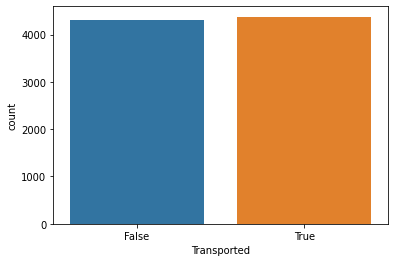

In [7]:
sns.countplot(data=train, x = 'Transported')

In [8]:
train.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [9]:
train = train.dropna()

train = train.drop(cat_features, axis = 1)

target_map = {True : 1, False : 0}
train.Transported = train.Transported.map(target_map)
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [12]:
x = train.drop(columns = 'Transported')
y = train.Transported

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
clf = SVC(C = 0.1) # C : 0.1~1000, kernel : 'linear'
clf2 = RandomForestClassifier(n_estimators = 100,
                              max_depth= 3, # rule-of-thumb : sqrt of features
                              max_features=0.8, # 0.7~0.9
                              random_state=42,
                              n_jobs=2)

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=0.8, n_jobs=2, random_state=42)

In [19]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

pred_train2 = clf2.predict(X_train)
pred_test2 = clf2.predict(X_test)

print('%.3f' % accuracy_score(y_train, pred_train))
print('%.3f' % accuracy_score(y_test, pred_test))
print('__' * 100)
print('%.3f' % accuracy_score(y_train, pred_train2))
print('%.3f' % accuracy_score(y_test, pred_test2))


0.779
0.775
________________________________________________________________________________________________________________________________________________________________________________________________________
0.787
0.781


In [20]:
t

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [23]:
#test = test.drop(cat_features, axis = 1)
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4186 non-null   float64
 1   RoomService   4195 non-null   float64
 2   FoodCourt     4171 non-null   float64
 3   ShoppingMall  4179 non-null   float64
 4   Spa           4176 non-null   float64
 5   VRDeck        4197 non-null   float64
dtypes: float64(6)
memory usage: 200.6 KB


In [31]:
test = pd.read_csv(base_path + 'test.csv')

In [32]:
test = test.drop(cat_features, axis = 1)
test = test.fillna(train.mean())
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.000000,0.0,0.0,0.0,0.0,0.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0
2,31.000000,0.0,0.0,0.0,0.0,0.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0
4,20.000000,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0
4274,28.894036,0.0,0.0,0.0,0.0,0.0
4275,28.894036,0.0,2680.0,0.0,0.0,523.0


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4277 non-null   float64
 1   RoomService   4277 non-null   float64
 2   FoodCourt     4277 non-null   float64
 3   ShoppingMall  4277 non-null   float64
 4   Spa           4277 non-null   float64
 5   VRDeck        4277 non-null   float64
dtypes: float64(6)
memory usage: 200.6 KB


In [34]:
output = clf.predict(test)
output

array([1, 0, 1, ..., 1, 1, 1])

In [35]:
submission = pd.read_csv(base_path + 'sample_submission.csv')
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [36]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [39]:
inverse_map = {0 : False, 1 : True}
temp = pd.Series(output).map(inverse_map).values

In [40]:
submission.Transported = temp
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [41]:
submission.to_csv('submission.csv', index=False)

## 회귀 (Regression)
- 회귀의 (비교적) 엄밀한 정의 (Formal Definition)

y = w1 * x1 + w2 * x2 + ... wn * xn

- 회귀의 직관적인 의미
   - 주어진 데이터와 원하는 값 사이의 관계를 찾는 방법
   - 주어진 데이터를 통해서 원하는 값을 예측하는 방법(y = target value)
   
   e.g. 부동산 매물 관련된 여러 가지 데이터(X)가 주어졌을 때, 집값(y)을 예측하는 작업

## 집값 예측(House Price Prediction)
<br>부동산 정보를 토대로 집값 예측하기

## 1. Linear Regression
<br>가장 직관적인 회귀 모델<br>
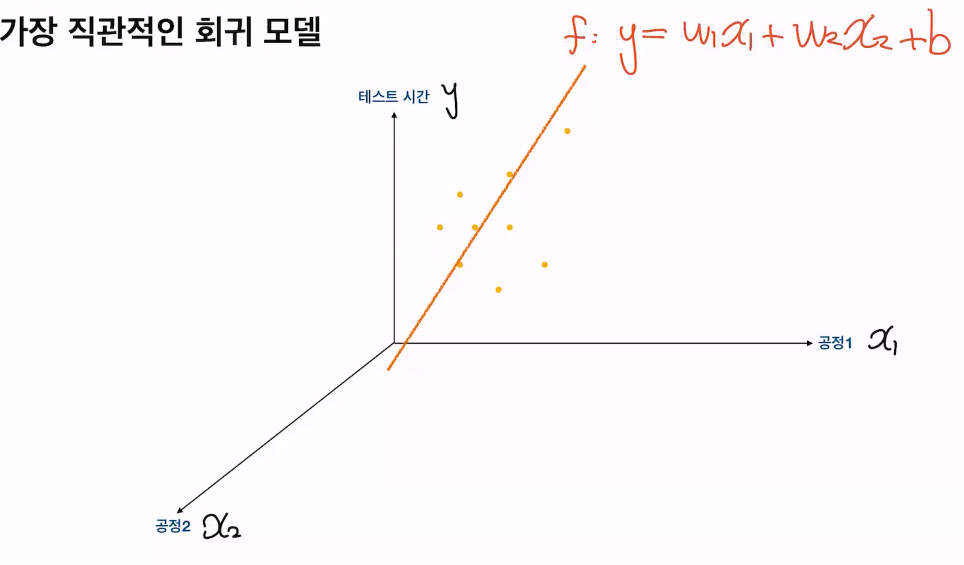

- linear model로 해당 데이터를 모두 만족시키는 solution이 없다.
  - linear model을 사용하지 않는다. 
    - 해석이 힘들고 overfitting될 가능성이 크다.
  
- linear regression 사용 이유 
  - 해석력이 매우 좋다. 
  - 일반화된 모델이 될 수 있다. 

주어진 데이터(X)와 찾은 평면 사이의 거리를 측정하여 그 차이가 가장 작은 평면을 선택한다. 
<br>-> 가장 일반화된 평면

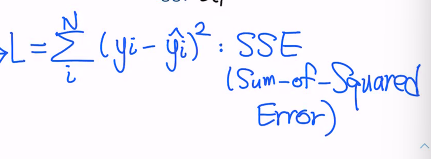

주어진 데이터(X)에 대하여 SSE가 최소가 되는 파라미터를 찾아야 한다.

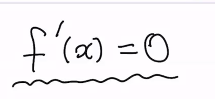

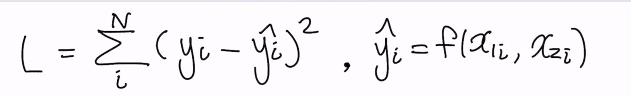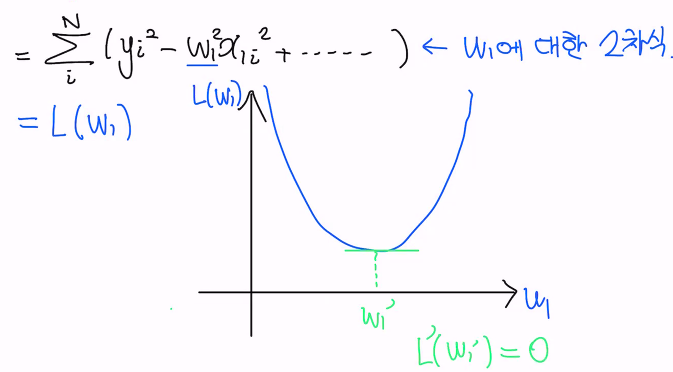

Computationally efficient
<br>-> Gradient Descent Algorithm
<br>"Convex"

## Gradient Boosting Model
  - Boosting
    - 이전 트리를 보완하는 방식으로 학습되는 앙상블 기법
    - Sequentially training
    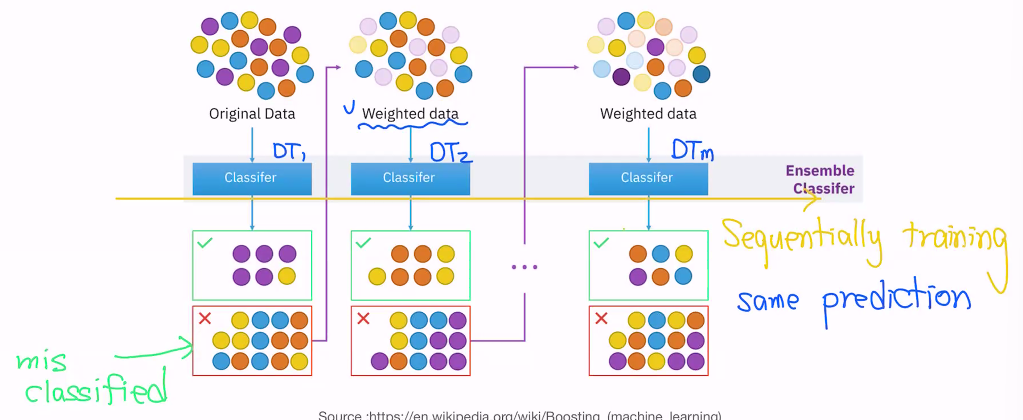

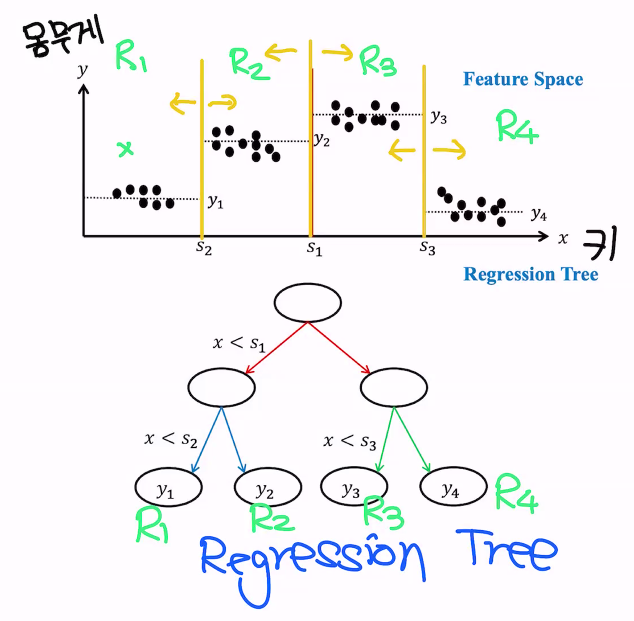

- MSE (Mean-Squared-Error)가 작아지는 곳을 기준으로 나눈다.
- 나뉜 영역의 데이터 최소 개수 (일반화를 하기 위함)

- Gradient Boosting
  - 이전 트리를 보완하는 방식으로 학습되는 앙상블 기법
  

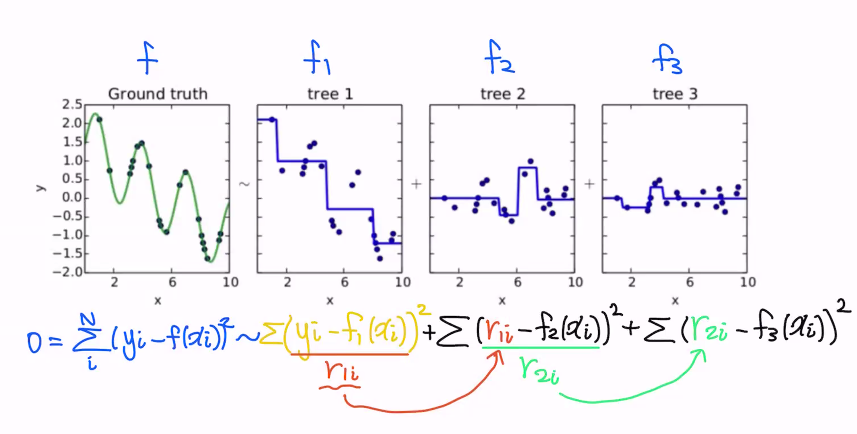

+ Regularization 